In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
# data cleaning
# eda
# text preprocessing
# model building
# evaluation
# improvement
# website
# deploy

# 1. Data Cleaning (missing and duplicate values)

In [3]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# dropping last 3 columns because they dont have a lot of data

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
264,ham,Why you Dint come with us.
884,ham,Yoyyooo u know how to change permissions for a...
4162,ham,I told that am coming on wednesday.
103,ham,wow. You're right! I didn't mean to do that. I...
3751,ham,Why are u up so early?


In [8]:
# ham is a normal text while others are spam, so converting ham to 0 and spam to 1 using label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,text
1809,0,"Aight, I'll ask a few of my roommates"
2324,0,Ok lor.
4695,0,A guy who gets used but is too dumb to realize...
2961,0,"\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\"""""
1301,0,I tot u reach liao. He said t-shirt.


In [11]:
df.isnull().sum()

# no missing values

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
#  Removing duplicates, keep = first means the first value will remain

df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# 2. EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

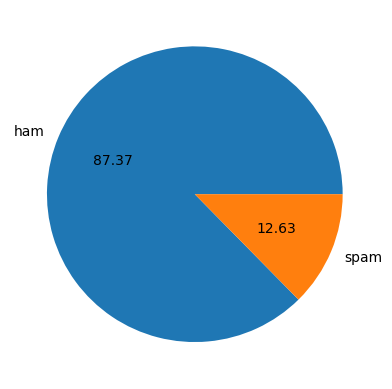

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kushaljirawla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#  gives an array of the length of all the texts

df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#  the number of words

df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# ham messages

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# spam messages

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

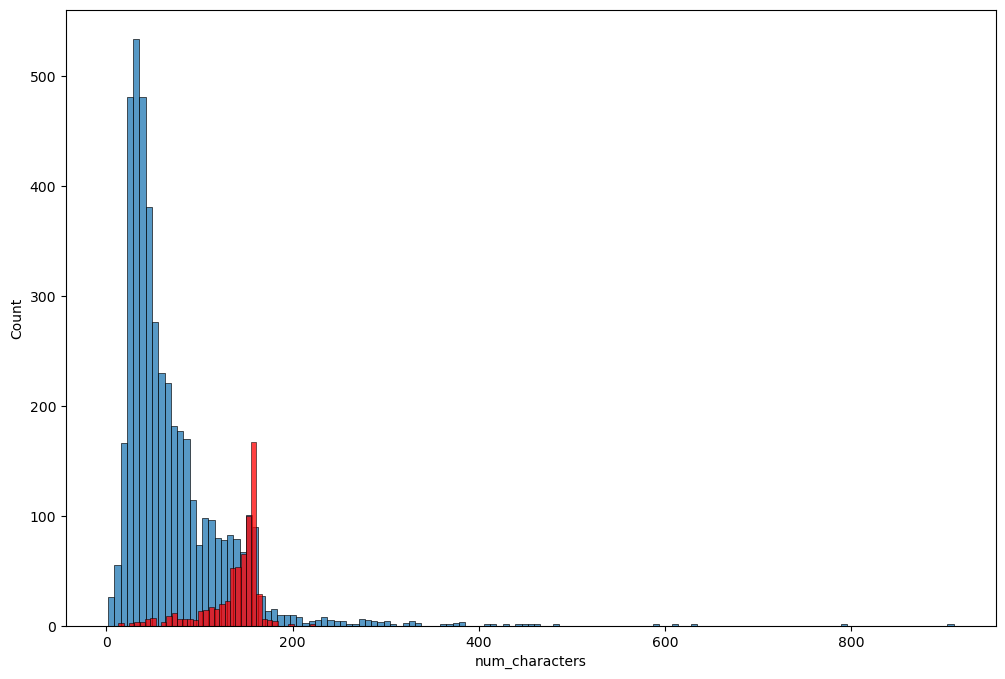

In [26]:
plt.figure(figsize=(12,8))

sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

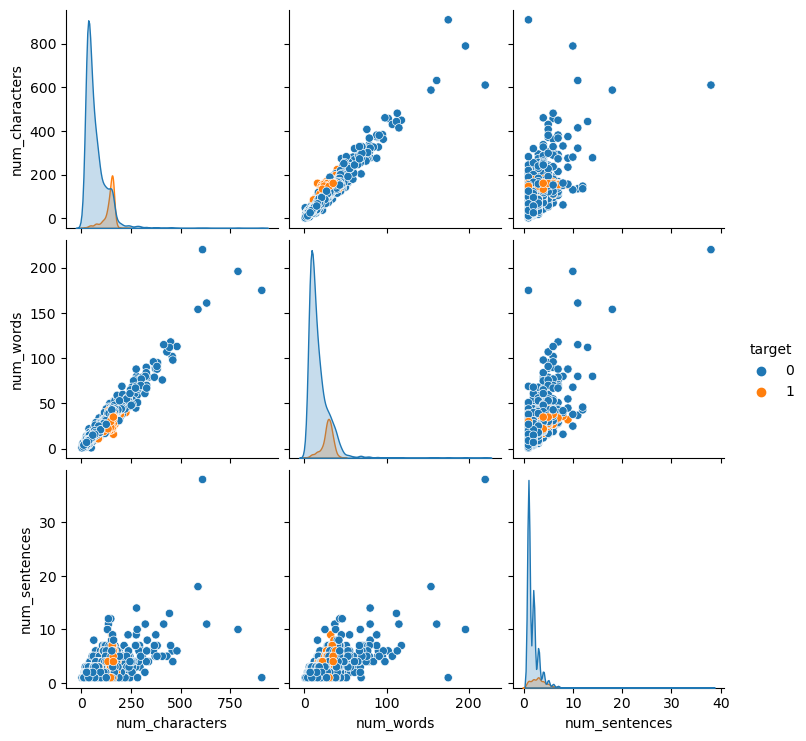

In [27]:
sns.pairplot(df, hue='target')

/tmp/ipykernel_53151/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

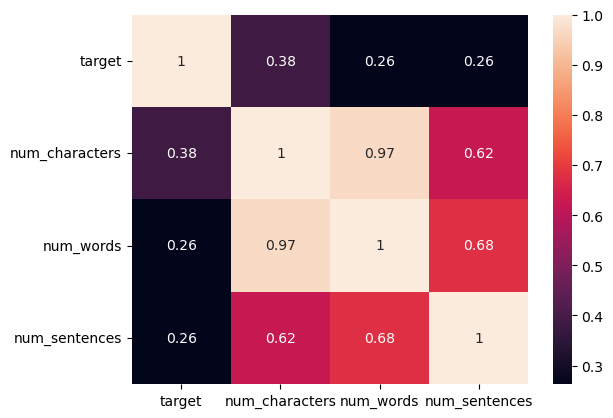

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
# Since the num_characters has the highest correlation with the target column

# 3. Data Preprocesing

Lower Case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming


In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

# nltk.corpus has a library stopwords which contains words like 
# me their what etc which dont hold much value in the meaning of the sentence rather used for its formation

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [31]:
transform_text('Hi how% are you doing in India? what is up? I love machine learning')

'hi india love machin learn'

# Stemming

In [32]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('lovely')

# adding stemming to the function 

'love'

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Word Cloud

In [35]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

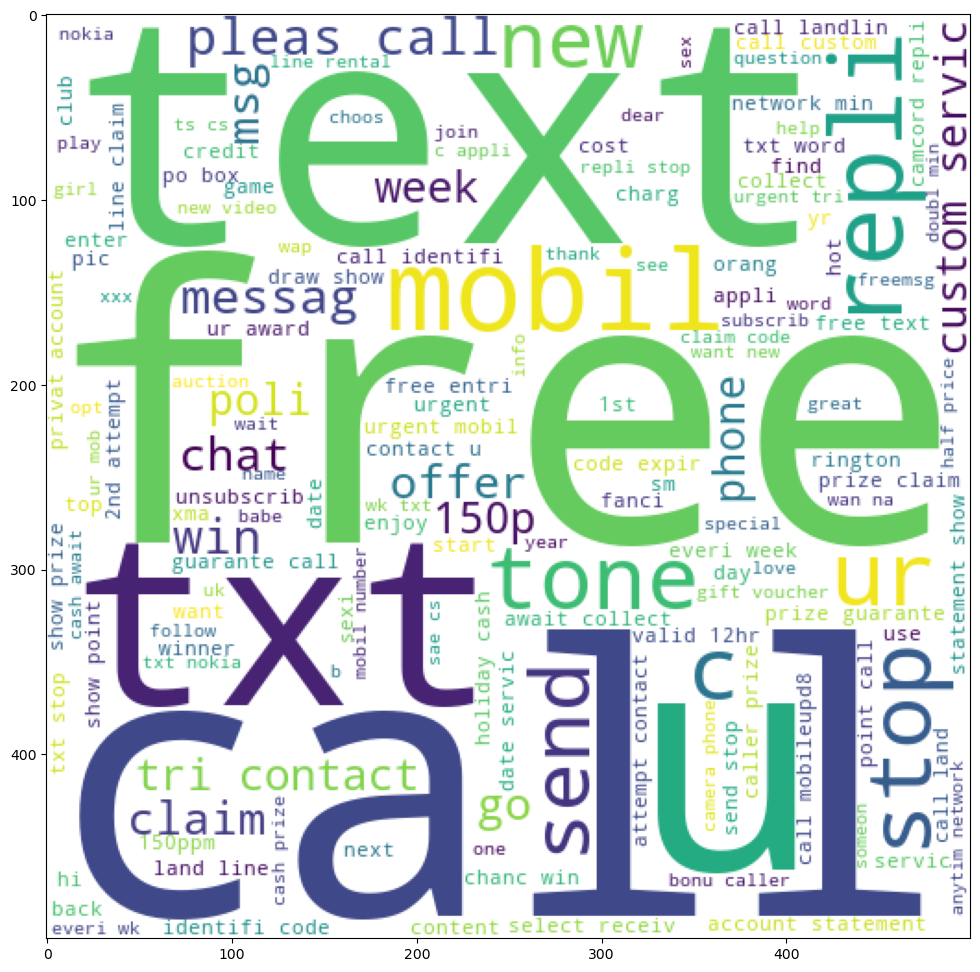

In [37]:
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

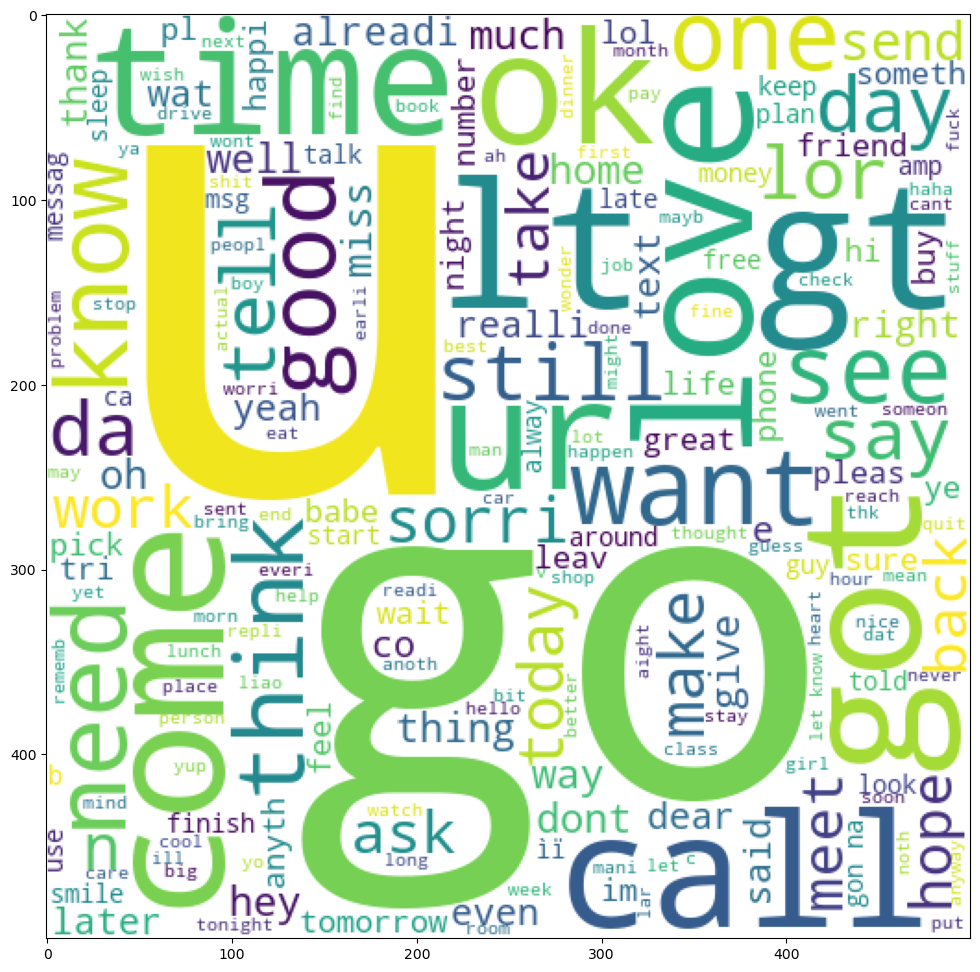

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,12))
plt.imshow(ham_wc)

In [39]:
# top 30 words of ham and spam

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

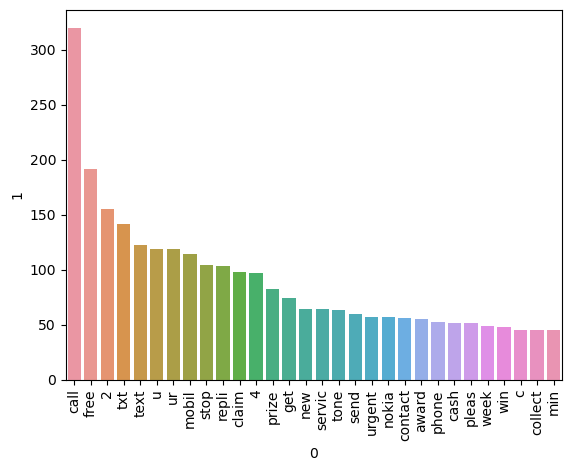

In [42]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
# makes the words turn vertical for them to be readable
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35404

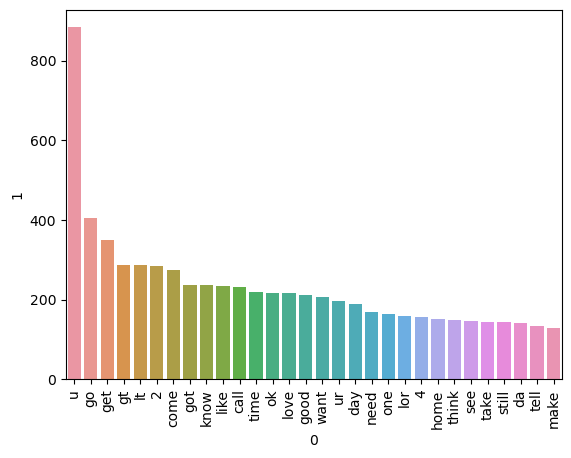

In [45]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
# makes the words turn vertical for them to be readable
plt.show()

# Model Building

In [46]:
# textual data usually works best with naive bayes model, we will try naive bayes first and other models later

In [47]:
# text must be vectorized

In [48]:
# Bag of Words- checking the most common words


In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000) #through trail and error

In [50]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [51]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
X.shape

(5169, 3000)

In [53]:
y = df['target'].values
y.shape

(5169,)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train,y_train)
y1 = gnb.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test,y1))
print(confusion_matrix(y_test,y1))
print(precision_score(y_test,y1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [60]:
# Best model
# Tfidf --> MNB

mnb.fit(X_train,y_train)
y2 = mnb.predict(X_test)
print(accuracy_score(y_test,y2))
print(confusion_matrix(y_test,y2))
print(precision_score(y_test,y2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
bnb.fit(X_train,y_train)
y3 = bnb.predict(X_test)
print(accuracy_score(y_test,y3))
print(confusion_matrix(y_test,y3))
print(precision_score(y_test,y3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [62]:
# the data is imbalanced which means the are more normal texts than spam texts
# therefore in such a case the precision score matters a lot more than the accuracy

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [69]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [70]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


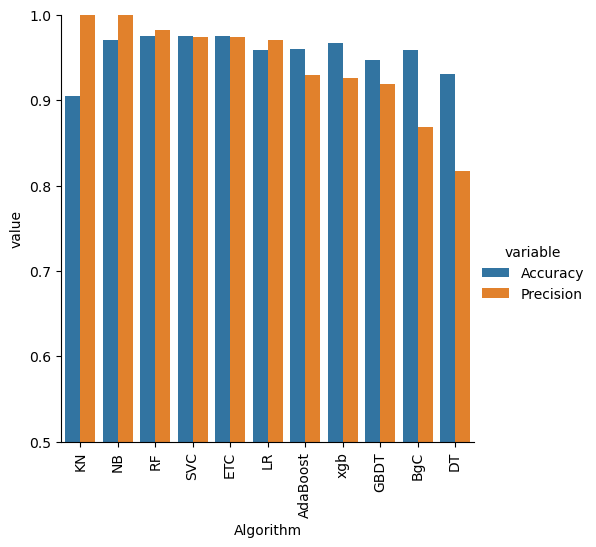

In [71]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))